## 11.5 Homework

#### 1, Monte Carlo Integral

Calculate the area shaded in green
![Homework](https://raw.githubusercontent.com/qzhu2017/2017-cmp/master/img/MC1.png)

#### 2, Error Analysis
Try to do the intergral many times (100) for different $N$ values (100, 1000, 10000, 100000), collect the data and calculate its standard varaince.


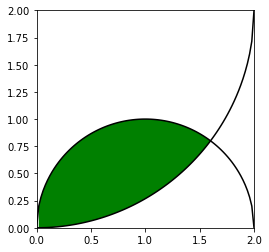

In [45]:
#appendex to give graph
import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

x1 = np.linspace(0,2,100)
y1 = np.sqrt(1-(x1-1)**2)
ax1.plot(x1,y1,'k')

y2 = 2-np.sqrt(4-x1**2)
ax1.plot(x1,y2,'k')

ax1.set_xlim(0,2)
ax1.set_ylim(0,2)
ax1.fill_between(x1, y1, y2, where=y1>y2, facecolor='green')

plt.show()
#plt.savefig('MC1.png')

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

#problem functions
def f1(x): #top
    return np.sqrt(1-(x-1)**2)
def f2(x): #bottom
    return 2-np.sqrt(4-x**2)

#mc integral for this problem
def MC(N):
    count = 0
    for i in range(N):
        x = 2*random()
        y = random()
        if y<f1(x) and y>f2(x):
            count += 1
    I = 2*count/N
    return I

In [48]:
#first time for each
print("Doing 1 run of everything")
print("N = 100:     ", MC(100))
print("N = 1000:    ", MC(1000))
print("N = 10,000:  ", MC(10000))
print("N = 100,000: ", MC(100000))

Doing 1 run of everything
N = 100:      0.96
N = 1000:     0.946
N = 10,000:   0.9618
N = 100,000:  0.96096


In [53]:
n1 = 0.0
n2 = 0.0
n3 = 0.0
n4 = 0.0

i=0
for i in range(100):
    n1 += MC(100)
    n2 += MC(1000)
    n3 += MC(10000)
    n4 += MC(100000)

print("Doing 100 runs of everything")
print("N = 100:     ", n1/100)
print("N = 1000:    ", n2/100)
print("N = 10,000:  ", n3/100)
print("N = 100,000: ", n4/100)

Doing 100 runs of everything
N = 100:      0.9632000000000002
N = 1000:     0.9606999999999999
N = 10,000:   0.9615019999999994
N = 100,000:  0.9622140000000001


So the area of the shaded region is 

Area = 0.962

#### Error Analysis

In [54]:
#standard deviation

delta1 = np.sqrt(((n1/100)*(1 - (n1/100)))/100)
delta2 = np.sqrt(((n2/100)*(1 - (n2/100)))/1000)
delta3 = np.sqrt(((n3/100)*(1 - (n3/100)))/10000)
delta4 = np.sqrt(((n4/100)*(1 - (n4/100)))/100000)

print("standard Deviation")
print("N = 100:     ", delta1)
print("N = 1000:    ", delta2)
print("N = 10,000:  ", delta3)
print("N = 100,000: ", delta4)

standard Deviation
N = 100:      0.01882704437770301
N = 1000:     0.006144551244802187
N = 10,000:   0.0019239517664432376
N = 100,000:  0.0006029777624755318


So as expected, as N increases, our accuracy increases.